In [26]:
# Mounting the Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

# Setting my input location to the Google Colab
%cd /content/gdrive/My Drive/DIS/Project2/Problem 2

# Displaying contents in the location
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/DIS/Project2/Problem 2
lena.png  Output.png  wolves.png


In [27]:
# Importing the required libraries for the problem
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [28]:
#defining the DFT2 

def DFT2(image):
  if (image.dtype != complex):    # checking if the input image is complex
    ip_img = image.astype(complex)    # if not converting image values into complex values
  else:
    ip_img = image

  fft_r = np.fft.fft(ip_img,axis=0)   # taking fft of rows of of the original ip using in-built fft
  fft_c = np.fft.fft(fft_r,axis=1)    # taking fft of columns of the obtained op from previous using in-built fft - WHICH IS THE 2D DFT
  return fft_c

In [29]:
# defining the inverse DFT function

def IDFT2(image):    
  img_con1 = np.conj(image)     # taking the conjugate
  second_fft = DFT2(img_con1)     # calling the 2D DFT function to take the DFT for inversing
  img_con2 = np.conj(second_fft)    # taking conjugate
  op = img_con2 / (image.shape[0]*image.shape[1])   # dividing by M*N
  op = abs(op) *255       # taking the absolute value of the complex values and rescaling it to [0 to 255]
  op = np.round(op).astype(np.int32)    # rounding the values and converitng to right format
  return op

In [32]:
IP_Image = cv2.imread('./lena.png',0)     # reading the image
IP_Image1 = IP_Image/255        # scaling it to [0,1]

G = DFT2(IP_Image1)       # finding the 2d DFT using the user-defined function
shifted_ip = np.fft.fftshift(G)     # shifting the FFT for plotting the magnitude and phase spectrum from -pi/2 to pi/2

magnitude_sp = np.log(1+np.abs(shifted_ip))     # plotting magnitude spectrum
phase_sp = np.angle(shifted_ip)         # plotting phase spectrum

H = IDFT2(G)        # finding the inverse DFT using the user-defined function

d = np.array(IP_Image) - np.array(H)      # finding the difference between the original image and the inverse DFT = 0

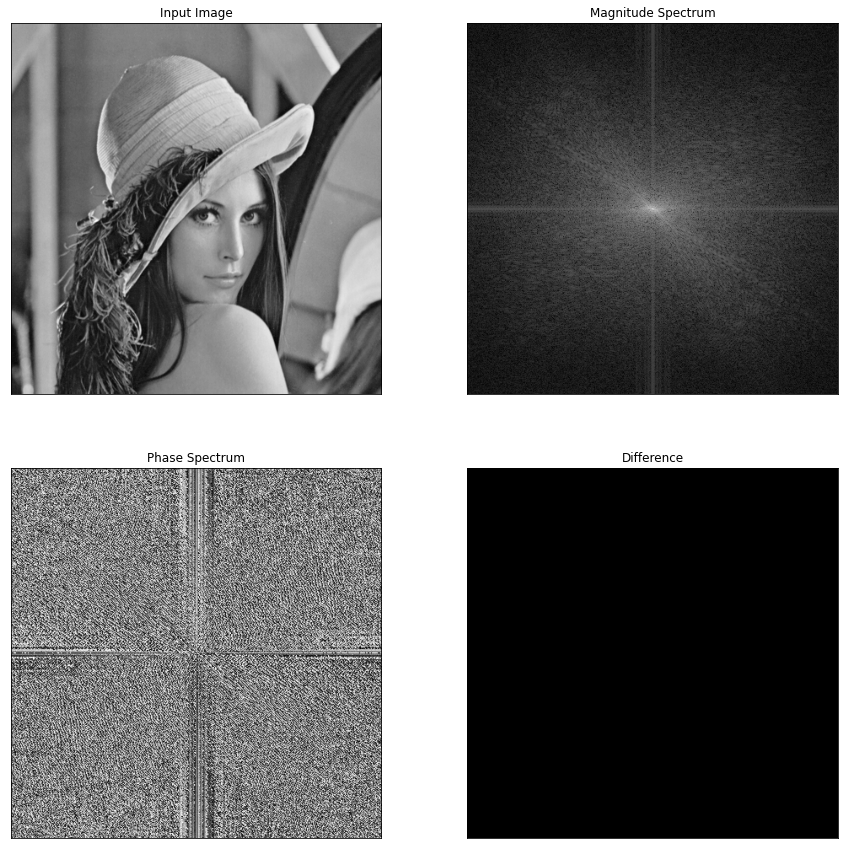

In [34]:
plt.figure(figsize=(15,15))       # plotting all the results

plt.subplot(221)
plt.imshow(IP_Image, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Input Image')

plt.subplot(222)
plt.imshow(magnitude_sp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Magnitude Spectrum')

plt.subplot(223)
plt.imshow(phase_sp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Phase Spectrum')

plt.subplot(224)
plt.imshow(d, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Difference')

plt.savefig('Output.png')
plt.show()